# Drawing molecules

In [28]:
from rdkit import Chem

In [29]:
#Beispielmoleküle
ethen = "C=C"
benzol = "c1ccccc1"
scharf = "CC(C)/C=C/CCCCC(=O)NCC1=CC(=C(C=C1)O)OC"
morgen = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
chill = "CCCCCC1=CC(=C2C3C=C(CCC3C(OC2=C1)(C)C)C)O"

scharf = $\mathrm{C_{18}H_{27}NO_3}$ = Capsaicin

morgen = $\mathrm{C_{8}H_{10}N_4O_2}$ = Coffein

chill = $\mathrm{C_{21}H_{30}O_2}$ = Cannabinol


In rdkit werden moleküle als sogenannte Chem objekte behandelt. Diese können aus smiles strings erzeugt werden:

In [30]:
from rdkit.Chem import Draw
m = Chem.MolFromSmiles(morgen)
mols = [Chem.MolFromSmiles(s) for s in [scharf, morgen, chill]]
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300, 300))

from rdkit.Chem import rdMolDescriptors

names = [rdMolDescriptors.CalcMolFormula(Chem.MolFromSmiles(s)) for s in [scharf, morgen, chill]]
print(names)

['C18H27NO3', 'C8H10N4O2', 'C21H30O2']


zum zeichnen importieren wir noch etwas:

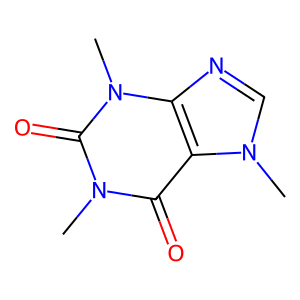

In [31]:
from IPython.display import display

img = Draw.MolToImage(m, size=(300, 300))
display(img) # Coffein

# Aufgabe 1:

Zeichnen Sie alle Beispielmoleküle ... nicht als Spaghetti code sondern über eine liste und eine for Schleife?!

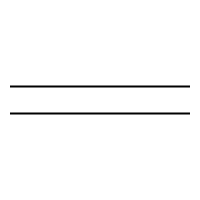

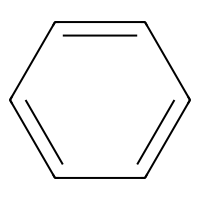

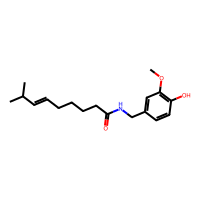

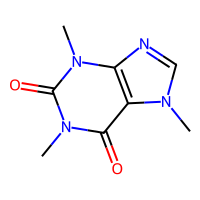

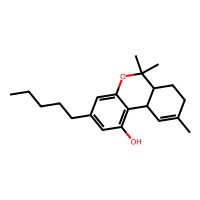

In [32]:
#your code goes here
mols = [ethen, benzol, scharf, morgen, chill]

for mol in mols:
    m = Chem.MolFromSmiles(mol)
    img = Draw.MolToImage(m, size = (200, 200))
    display(img)

manchmal muss man moleküle beim zeichnen aneinander ausrichten ... das geht so:

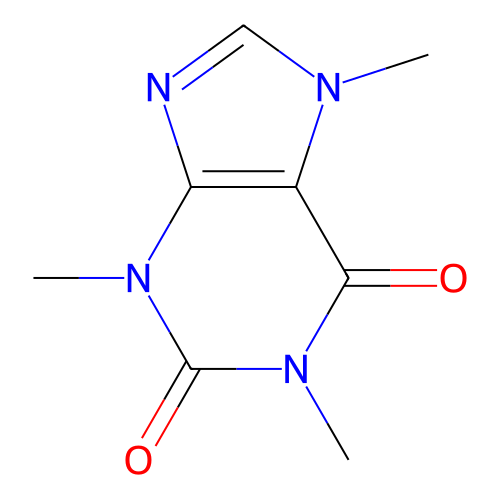

In [33]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

# SMILES strings
smiles_template = 'C=O'  # Subgroup from whatever molecule

# Create molecule and template objects
mol = Chem.MolFromSmiles(morgen)
template = Chem.MolFromSmiles(smiles_template)

# Generate 2D coordinates for the template
AllChem.Compute2DCoords(template)

# Align THC to the template
AllChem.GenerateDepictionMatching2DStructure(mol, template)

# Draw the molecule
img = Draw.MolToImage(mol, size=(500, 500))
display(img)

# Obtaining and reading data

You can have a look at https://zinc15.docking.org/genes/DRD2/substances/ where there are over 250.000.000 Substances for virtual screening!

We will now download a large dataset of 250.000 molecules with some additional data:

In [34]:
import requests

def download_file(url, download_path):
    response = requests.get(url)
    if response.status_code == 200:
        #we discuss what this line does:
        file_path = f"{download_path}/250k_rndm_zinc_drugs_clean_3.csv"
        file = open(file_path, "wb")
        file.write(response.content)
        file.close()
        print(f"File downloaded successfully: {file_path}")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")

# Provide the URL and the download path
url = "https://raw.githubusercontent.com/aspuru-guzik-group/chemical_vae/master/models/zinc_properties/250k_rndm_zinc_drugs_clean_3.csv"
download_path = "/home/mmr/how-to-python/chem_python"  # Replace with your desired folder path

download_file(url, download_path)

File downloaded successfully: /home/mmr/how-to-python/chem_python/250k_rndm_zinc_drugs_clean_3.csv


# Two ways of reading in large files!

In [35]:
# using open and readline
# scoping with open(file_path, 'r', encoding='utf-8') as file:
# readline() vs. readlines()
file_path = "/home/mmr/how-to-python/chem_python/250k_rndm_zinc_drugs_clean_3.csv"
file = open(file_path, "r", encoding="utf-8")

In [36]:
#using pandas ... might need to pip install it
header = file.readline()
smiles, logP, dls = [], [], []

for i in range(1000):
    smile = file.readline()[1:]
    # daten = file.readline()[2:]
    daten = [float(f) for f in file.readline()[2:].strip("\n").split(",")]
    smiles.append(smile)
    logP.append(daten[0])   
    dls.append(daten[1]) 
print(smile)

Cc1cccc([C@H](CCl)CCC[C@@H]2CCCO2)c1



In [37]:
# daten.split(",")
# [float(f) for f in daten.split(",")]
float(".456")

0.456

In [38]:
import pandas as pd
df = pd.read_csv(file_path, delimiter= ",")

zeile  = file.readline()
print(zeile)
# df.columns

"[NH3+][C@@H](CSCc1nccs1)C(=O)[O-]



1.	logP:

	•	The logarithm of the partition coefficient (P) of a compound between octanol and water.

	•	Used as a measure of a molecule’s hydrophobicity.

	•	Higher logP indicates greater hydrophobicity, while lower (or negative) values indicate hydrophilicity.

	•	Plays a critical role in drug-likeness as it affects solubility and membrane permeability.
	
2.	qed (Quantitative Estimate of Drug-likeness):

	•	A score representing how “drug-like” a compound is based on several molecular properties (e.g., molecular weight, number of hydrogen bond donors/acceptors, and logP).

	•	The score ranges between 0 (not drug-like) and 1 (highly drug-like).

	•	A high QED value suggests that a molecule is likely to have favorable pharmacological properties.
	
3.	SAS (Synthetic Accessibility Score):

	•	A heuristic score estimating how easy it would be to synthesize the molecule in a lab.

	•	Lower values indicate higher synthetic accessibility (easier to make).

	•	Factors influencing SAS include molecule size, complexity, and the presence of unusual or challenging substructures.
	

# Statistics

Now we want to plot some statistics and simple correlations!


In [39]:
import numpy as np
logP = np.array(logP)

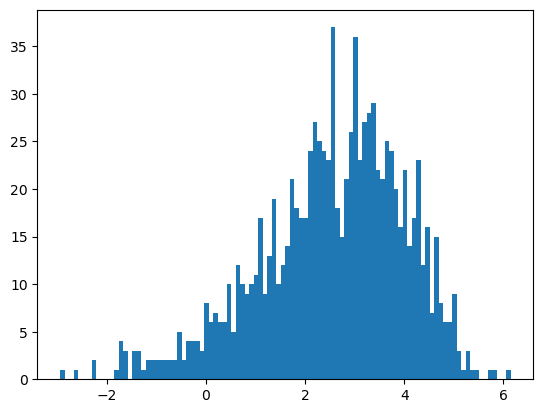

In [40]:
import matplotlib.pyplot as plt
_ = plt.hist(logP, 100)

In [41]:
print(np.mean(logP))
print(np.median(logP))
print(np.percentile(logP, 95))

2.5447528700000004
2.68833
4.62554


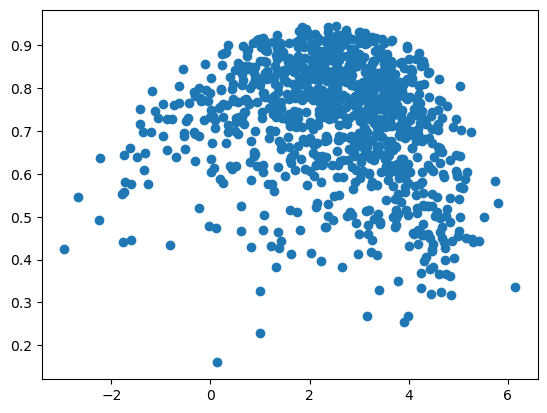

In [42]:
plt.scatter(logP, dls)

# R2 score (and its issues)

The formula for the $R^2$ score is:

$$R^2 = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}$$

where:
- $y_i$ are the observed values,
- $\hat{y_i}$ are the predicted values,
- $\bar{y}$ is the mean of the observed values.

# Tasks

Draw the most/least synthesizeable molecule

Draw the most/least hydrophobic molecule

then 


Draw the 100 most/least synthesizeable molecule

Draw the 100 most/least hydrophobic molecule